Попробуем взять распределение, которое не было рассмотрено в лекциях. Возьмём распределение Gumbel (gumbel_r) из библиотеки scipy.
Информация о распределении: https://en.wikipedia.org/wiki/Gumbel_distribution

In [1]:
from scipy.stats import gumbel_r, gompertz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Сгенерируем выборку объёмом 1000 и построим гистограмму

In [2]:
gumbel_r_rv = gumbel_r(0, 1)
sample = gumbel_r_rv.rvs(1000)

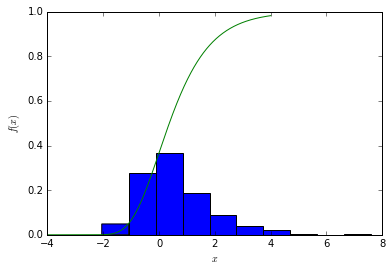

In [3]:
plt.hist(sample, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

x = np.linspace(-4,4,1000)
cdf = gumbel_r_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

Возьмём 5 выборок размерами 2, 5, 10, 50, 200 и построим для них гистограммы, а также посчитаем параметры нормального распределения (мат. ожидание, дисперсию)

Для выборки объёмом 2:
Дисперсия распределения: 0.822467033424
Дисперсия выборки: 76.0401578606
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 75.2176908272
***********************
Для выборки объёмом 5:
Дисперсия распределения: 0.32898681337
Дисперсия выборки: 34.4693052205
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 34.1403184071
***********************
Для выборки объёмом 10:
Дисперсия распределения: 0.164493406685
Дисперсия выборки: 17.0819546575
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 16.9174612508
***********************
Для выборки объёмом 50:
Дисперсия распределения: 0.032898681337
Дисперсия выборки: 3.18841383351
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 3.15551515217
***********************
Для выборки объёмом 200:
Дисперсия распределения: 0.00822467033424
Дисперсия выборки: 0.81854153037

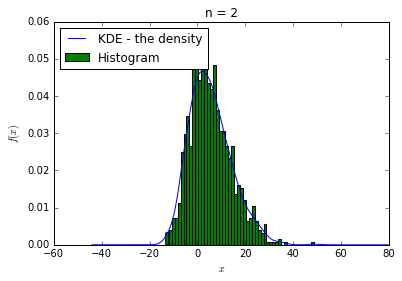

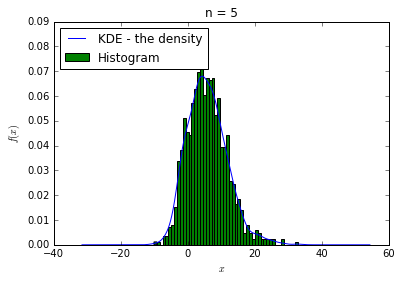

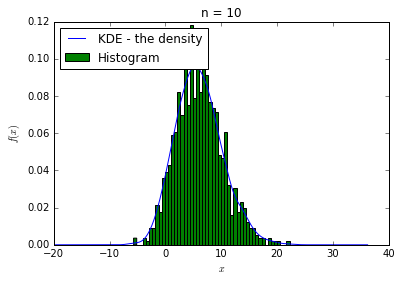

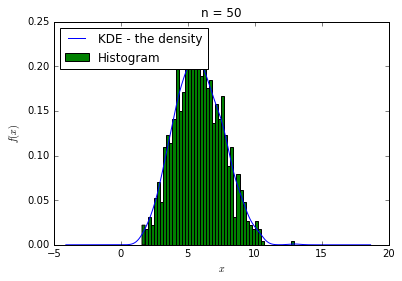

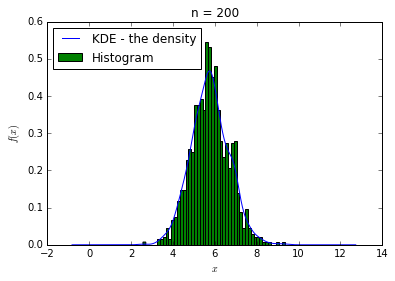

In [4]:
n = [2, 5, 10, 50, 200]
for i in n:
    ex1 = []
    for j in np.arange(1000):
        gumbel_r_rv = gumbel_r(0, 10)
        sample = gumbel_r_rv.rvs(i)
        sample_mean = sample.mean()
        ex1.append(sample_mean)
 
         # дисперсия распределения, делённая на её объём
        is_var = gumbel_r.var()/i
    
    # согласно ЦПТ среднее значение исходного распределения равно мат. ожиданию нормального распределения
    # дисперсия нормального распределения равно дисперсии исходного распределения, разделённого на объём выборки.
    # Вычислим эти параметры и проверим их (насколько сходится)

    # дисперсия по всей выборк (предполагается, что будет нормальным с ростом n)
    is_var_norm = np.var(ex1)

    print('Для выборки объёмом {}:'.format(i))
    print('Дисперсия распределения: ' + str(is_var))
    print('Дисперсия выборки: ' + str(is_var_norm))
    print('Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: '
          + str(abs(is_var-is_var_norm)))
    print('***********************')

    # строим кривую плотности распределения
    df = pd.DataFrame(ex1, columns=['KDE - the density'])
    ax = df.plot(kind='density')

    # строим гистограмму
    plt.hist(ex1, bins=50, normed=True, label='Histogram')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('n = '+str(i))
    plt.legend(loc='upper left')

Попробуем для примера взять более "скошенное" распределение Гомпертца (gompertz). Информация о нём https://ru.wikipedia.org/wiki/Распределение_Гомпертца

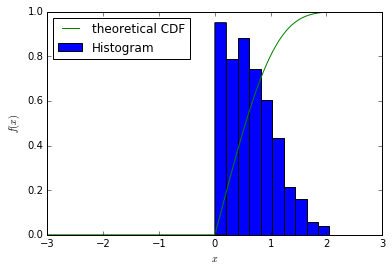

In [5]:
c = 0.947
gompertz_rv = gompertz(c)
sample = gompertz_rv.rvs(1000)

plt.hist(sample, normed=True, label='Histogram')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

x = np.linspace(-3,3,1000)
cdf = gompertz_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')
plt.legend(loc='upper left')

Возьмём 5 выборок размерами 2, 5, 10, 50, 200 и построим для них гистограммы, а также посчитаем параметры нормального распределения (мат. ожидание, дисперсию). Проделаем те же операции, что и делали с распределением Gumbel

Для выборки объёмом 2:
Дисперсия распределения: 0.822467033424
Дисперсия выборки: 1.99447510375e-06
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 0.822465038949
***********************
Для выборки объёмом 5:
Дисперсия распределения: 0.32898681337
Дисперсия выборки: 1.97713669098e-06
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 0.328984836233
***********************
Для выборки объёмом 10:
Дисперсия распределения: 0.164493406685
Дисперсия выборки: 1.95637709233e-06
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 0.164491450308
***********************
Для выборки объёмом 50:
Дисперсия распределения: 0.032898681337
Дисперсия выборки: 1.9795327261e-06
Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: 0.0328967018042
***********************
Для выборки объёмом 200:
Дисперсия распределения: 0.00822467033424
Дисперсия вы

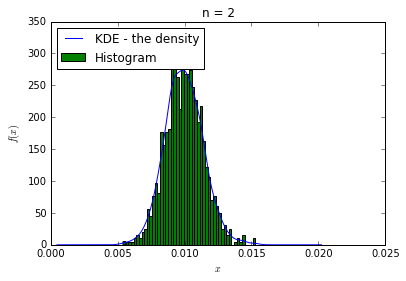

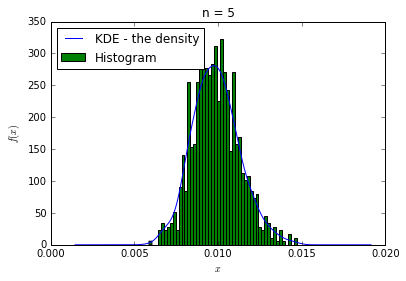

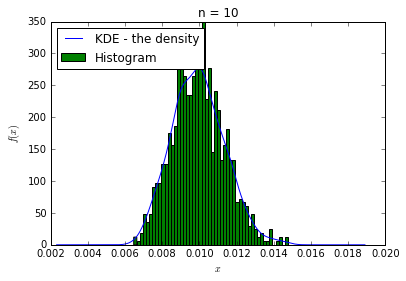

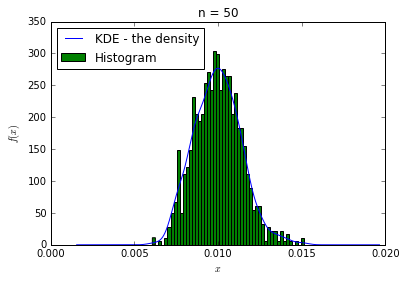

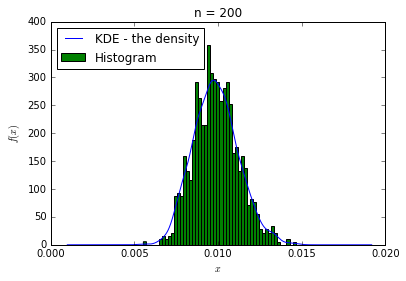

In [6]:
n = [2, 5, 10, 50, 200]
for i in n:
    ex1 = []
    for j in np.arange(1000):
        gompertz_rv = gompertz(100)
        sample = gompertz_rv.rvs(50)
        sample_mean = sample.mean()
        ex1.append(sample_mean)
 
         # дисперсия распределения, делённая на её объём
        is_var = gumbel_r.var()/i
    
    # согласно ЦПТ среднее значение исходного распределения равно мат. ожиданию нормального распределения
    # дисперсия нормального распределения равно дисперсии исходного распределения, разделённого на объём выборки.
    # Вычислим эти параметры и проверим их (насколько сходится)

    # дисперсия по всей выборк (предполагается, что будет нормальным с ростом n)
    is_var_norm = np.var(ex1)

    print('Для выборки объёмом {}:'.format(i))
    print('Дисперсия распределения: ' + str(is_var))
    print('Дисперсия выборки: ' + str(is_var_norm))
    print('Разница между дисперсией распределения, разделённой на объём выборки, и дисперсии выборки: '
          + str(abs(is_var-is_var_norm)))
    print('***********************')

    # строим кривую плотности распределения
    df = pd.DataFrame(ex1, columns=['KDE - the density'])
    ax = df.plot(kind='density')

    # строим гистограмму
    plt.hist(ex1, bins=50, normed=True, label='Histogram')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('n = '+str(i))
    plt.legend(loc='upper left')

### Вывод

Исходя из графиков, видно, что с ростом количества элементов в выборке распределения, среднее по всем выборкам всё лучше и лучше описывается нормальным распределением. Это видно как из графиков (гистограммы у основания становятся уже), так и из математических расчётов. Дисперсия наугад взятого распределения, разделённая на объём выборки, стремится к дисперсии по всей выборке средких значений с ростом n